In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'module3-dimensionality-reduction'))
	# print(os.getcwd())
except:
	pass

In [2]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'

 # Vertical Line Test

 ## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

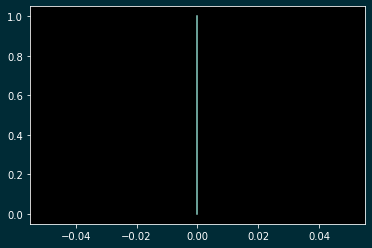

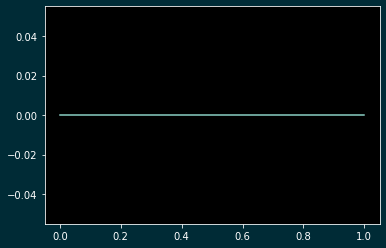

In [3]:
import matplotlib.pyplot as pyplot

pyplot.plot([0,0],[0,1])
pyplot.show()
pyplot.plot([0,1],[0,0])
pyplot.show()


 ## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

 Multiple outputs to a given input

 # Functions as Relations

 ## 2.1 Which of the following relations are functions? Why?

 \begin{align}
 \text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
 \\
 \text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
 \\
 \text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
 \\
 \text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
 \\
 \text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
 \end{align}

 2 only - all else fail vert line test

 # Functions as a mapping between dimensions


 ## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

 \begin{align}
 m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
 \\
 n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
 \end{align}

 m: domain = R3, codomain = R3

 n: domain = R4, codomain = R2

 ## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

 \begin{align}
 a(𝑥)=(𝑥, 𝑥, 𝑥)
 \end{align}

 # Vector Transformations

 ## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

 \begin{align}
 p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
 \\
 p(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ -1 \\  \end{bmatrix}
 \\
 p(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3 \\ 2 \\  \end{bmatrix}
 \\
 T_p = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
 \\
 q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
 \\
 q(\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}) = \begin{bmatrix} 4 \\ -1 \\ 5 \end{bmatrix}
 \\
 q(\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}
 \\
 q(\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 2 \\ 3 \\ -2 \end{bmatrix}
 \\
 T_q = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
 \end{align}

 ## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [4]:
import numpy
mP_T = numpy.array([[1,3],[-1,2]])
mQ_T = numpy.array([	[ 4,  1,  2],
						[-1,  2,  3],
						[ 5,  1, -2]])

vA = [242, -867]
pRes = [vA[0] + 3*vA[1], 2*vA[1] - vA[0]]
print(f'Manual calculation: p({vA}) = {pRes}')
print(f'matmul: T{vA} = {numpy.matmul(mP_T, vA)}')

vB = [-602, -8.67, 2207]
qRes = [4*vB[0] + vB[1] + 2*vB[2],
		2*vB[1] - vB[0] + 3*vB[2],
		5*vB[0] - 2*vB[2] + vB[1]]
print(f'Manual calculation: q({vB}) = {qRes}')
print(f'matmul: T{vB} = {numpy.matmul(mQ_T, vB)}')





Manual calculation: p([242, -867]) = [-2359, -1976]
matmul: T[242, -867] = [-2359 -1976]
Manual calculation: q([-602, -8.67, 2207]) = [1997.33, 7205.66, -7432.67]
matmul: T[-602, -8.67, 2207] = [ 1997.33  7205.66 -7432.67]


 # Eigenvalues and Eigenvectors

 ## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

 A vector such that, when a given transformation is applied to the vector space, changes only in magnitude (a scalar, given by the eigenvalue).


 # The Curse of Dimensionality

 ## 6.1 What are some of the challenges of working with high dimensional spaces?

 Exponential increase in complexity


 ## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

 observations >= 5x parameters


 # Principal Component Analysis

 ## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below.

 ## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

 Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

 Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2.

 The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [5]:
import os.path
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import pandas as pd

# Read National Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)



KeyboardInterrupt: 

In [6]:
# Look at first 5 rows
print(national.shape)
national.head()



NameError: name 'national' is not defined

In [7]:
# Look at datatypes
# a lot of object datatypes even though they look to be strings of numbers.
national.dtypes



NameError: name 'national' is not defined

In [8]:
# check for null values
national.isnull().sum().any()



NameError: name 'national' is not defined

In [9]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')



NameError: name 'national' is not defined

In [10]:
# national_processed = national.copy()

# Get One-Hot-Encoding of categorical variables
national_processed = pd.get_dummies(national)
del national


NameError: name 'national' is not defined

In [11]:
#print(national_processed.shape)
#national_processed.head()


In [12]:
target = 'VALUE'
x_cols = list(num_cols).copy()
x_cols.remove(target)
new_cols = list(national_processed.columns[national_processed.dtypes!='object'])
for col in x_cols:
	new_cols.remove(col)


NameError: name 'num_cols' is not defined

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
processed = scaler.fit_transform(national_processed[x_cols],y=national_processed[target]).join(national_processed[new_cols])
processed[0]


NameError: name 'national_processed' is not defined

In [14]:

pca = PCA(20)
pca.fit(processed,y=national_processed[target])

print(f'eigenvectors: {pca.components_}')
print(f'eigenvalues: {pca.explained_variance_}')
print(pca)


NameError: name 'processed' is not defined

In [15]:
import numpy
projected = pca.transform(processed)
print(f'projected: {projected}')


NameError: name 'processed' is not defined

In [16]:
projected[:,0].shape


NameError: name 'projected' is not defined

In [17]:
import matplotlib.pyplot as pyplot

pyplot.scatter(projected[:,1], projected[:,0], alpha=0.05, s=5)
pyplot.show()


NameError: name 'projected' is not defined

 # Stretch Goals

 ## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1.

 (You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

 ## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance?

 We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game.

 ## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

 Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

 ![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

 You don't necessarily have to use this resource, but this will get you started:
 [Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)